# Import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn import tree

#Dataset


In [ ]:
#load dataset
df = pd.read_csv('digits.csv')
df = df.astype(int)

df.head()

label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0      1       0       0       0  ...         0         0         0         0
1      0       0       0       0  ...         0         0         0         0
2      1       0       0       0  ...         0         0         0         0
3      4       0       0       0  ...         0         0         0         0
4      0       0       0       0  ...         0         0         0         0

[5 rows x 785 columns]

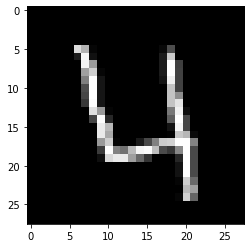

In [ ]:
# extract the images and labels from the dataset
dataset = df.values
X = dataset[:,1:]
y = dataset[:,0:1]
y = y.reshape(y.shape[0],)

#show an image from the dataset
img_idx = 3
img = X[img_idx].reshape(28,28)
plt.imshow(img, cmap='gray')

In [ ]:
#split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

# Random Forest with 1000 decision trees

In [ ]:
#Random Forest classifier with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#get the accuracy score of the Random Forest classifier with 1000 decision trees
y_predict = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test,y_predict))  

Accuracy: 0.965952380952381


# Decision Tree

In [ ]:
#Decision Tree classifier
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#get the accuracy score of the Decision Tree classifier
y_predict = dt.predict(X_test)
print("Accuracy:", accuracy_score(y_test,y_predict))

Accuracy: 0.8541666666666666


# Evaluation
In order to evaluate the performance of the Random Forest and Decision Tree classifiers, we will refer to their confusion matrices as well as precision-recall curves.

## Random Forest classifier

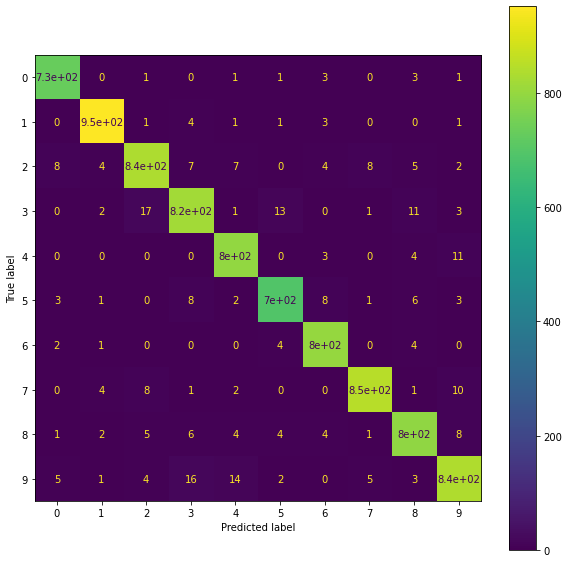

In [ ]:
#Confusion matrix of the Random Forest classifier
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(rf, X_test, y_test, ax=ax)

## Decision Tree classifier

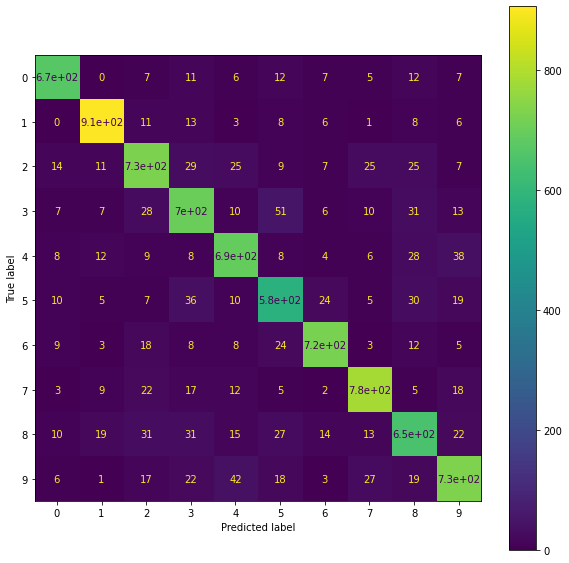

In [ ]:
#Confusion matrix of the Decision Tree classifier
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(dt, X_test, y_test, ax=ax)

# Feature importances

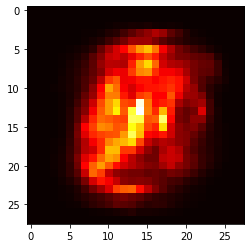

In [ ]:
#determine which pixels are especially important based on feature importances
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
forest_importances = pd.Series(importances, index=list(range(784))).to_numpy()

plt.imshow(forest_importances.reshape(28,28), cmap='hot', interpolation='nearest')
plt.show()